In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.feature_selection import mutual_info_classif

In [30]:
# the .csv files follow the pattern "SDSS (n).csv" and are numbered from 1 to 17
file_pattern = "SDSS ({num}).csv"
file_numbers = range(1, 18)

# Generate the full file paths
files = [file_pattern.format(num=num) for num in file_numbers]

# Next, concatenate these files
sdss_combined = pd.DataFrame()

for file in files:
    # Read the current CSV file into a DataFrame
    sdss = pd.read_csv(file)

    # Concatenate each sdss query into a single dataframe
    sdss_combined = pd.concat([sdss_combined, sdss], ignore_index=True)

# Print the total dimensionality
print(f"Dimensionality: {np.shape(sdss_combined)[0] * np.shape(sdss_combined)[1]}")
sdss_combined

Dimensionality: 2038848


,plate,mjd,fiberid,z,zErr,zWarning,class,bestObjID,objType,run,...,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
0,1505,52941,156,0.389562,0.000067,0,GALAXY,1237663784210530517,NONLEGACY,4263,...,23.125439,21.790100,20.101208,19.489414,19.024839,21.797628,20.614769,19.116451,18.525537,18.100412
1,2851,54485,486,0.000795,0.000011,0,STAR,1237663784210530324,NONLEGACY,4263,...,17.430862,16.606251,16.266584,16.134212,16.120159,17.541275,16.625443,16.326315,16.203777,16.185209
2,1555,53287,158,0.379204,0.000077,0,GALAXY,1237663784210530536,NONLEGACY,4263,...,23.658684,21.878881,19.953222,19.325336,18.858727,20.516718,20.508654,18.500441,17.840191,17.591818
3,701,52179,426,0.379125,0.000117,0,GALAXY,1237663784210530623,NONLEGACY,4263,...,24.913301,22.357603,20.705986,19.984390,19.710501,24.590675,20.440012,19.447878,18.827709,18.500956
4,701,52179,195,0.381811,0.000114,0,GALAXY,1237663784210531294,NONLEGACY,4263,...,24.833059,22.404722,20.614035,20.048290,19.560736,22.215349,20.974915,19.512709,18.837957,18.233456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84947,1909,53261,565,-0.001109,0.000077,0,STAR,1237663544211736109,NONLEGACY,4207,...,21.239357,20.240782,19.922716,19.754583,19.715046,21.249580,20.297592,20.018015,19.885736,19.867411
84948,1116,52932,489,0.000013,0.000023,0,STAR,1237663544211736747,NONLEGACY,4207,...,23.282341,21.154026,19.759577,19.211868,18.812143,23.476542,21.261414,19.869307,19.248789,18.833431
84949,1908,53239,618,-0.001138,0.000010,0,STAR,1237663544211800085,NONLEGACY,4207,...,18.428312,17.006844,16.344975,16.033613,15.819430,18.453526,17.065052,16.357840,16.051132,15.877373
84950,1022,52524,452,0.219960,0.000016,0,GALAXY,1237663544211801418,NONLEGACY,4207,...,22.127785,20.882309,20.053568,19.667034,19.188293,20.659279,19.663300,18.849623,18.465277,18.644720


In [31]:
# Based on domain knowledge, drop useless features
sdss_cleaned = sdss_combined.copy()
sdss_cleaned = sdss_cleaned.drop(columns=['plate', 'mjd', 'fiberid', 'zErr', 'zWarning', 'bestObjID', 'objType', 'run', 'rerun', 'camCol', 'field', 'obj'])
# Finally, we only want the redshift, the psf magnitudes, the petrosian magnitudes, and the class designation of the target
sdss_cleaned

,z,class,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z
0,0.389562,GALAXY,23.125439,21.790100,20.101208,19.489414,19.024839,21.797628,20.614769,19.116451,18.525537,18.100412
1,0.000795,STAR,17.430862,16.606251,16.266584,16.134212,16.120159,17.541275,16.625443,16.326315,16.203777,16.185209
2,0.379204,GALAXY,23.658684,21.878881,19.953222,19.325336,18.858727,20.516718,20.508654,18.500441,17.840191,17.591818
3,0.379125,GALAXY,24.913301,22.357603,20.705986,19.984390,19.710501,24.590675,20.440012,19.447878,18.827709,18.500956
4,0.381811,GALAXY,24.833059,22.404722,20.614035,20.048290,19.560736,22.215349,20.974915,19.512709,18.837957,18.233456
...,...,...,...,...,...,...,...,...,...,...,...,...
84947,-0.001109,STAR,21.239357,20.240782,19.922716,19.754583,19.715046,21.249580,20.297592,20.018015,19.885736,19.867411
84948,0.000013,STAR,23.282341,21.154026,19.759577,19.211868,18.812143,23.476542,21.261414,19.869307,19.248789,18.833431
84949,-0.001138,STAR,18.428312,17.006844,16.344975,16.033613,15.819430,18.453526,17.065052,16.357840,16.051132,15.877373
84950,0.219960,GALAXY,22.127785,20.882309,20.053568,19.667034,19.188293,20.659279,19.663300,18.849623,18.465277,18.644720


In [32]:
sdss_processed = sdss_cleaned.copy()
# Calculate the color indices based on the psf magnitudes
sdss_processed['psf_u-g'] = sdss_processed['psfMag_u'] - sdss_processed['psfMag_g']
sdss_processed['psf_g-r'] = sdss_processed['psfMag_g'] - sdss_processed['psfMag_r']
sdss_processed['psf_r-i'] = sdss_processed['psfMag_r'] - sdss_processed['psfMag_i']
sdss_processed['psf_i-z'] = sdss_processed['psfMag_i'] - sdss_processed['psfMag_z']
# Calculate the color indices based on the petrosian magnitudes
sdss_processed['petro_u-g'] = sdss_processed['petroMag_u'] - sdss_processed['petroMag_g']
sdss_processed['petro_g-r'] = sdss_processed['petroMag_g'] - sdss_processed['petroMag_r']
sdss_processed['petro_r-i'] = sdss_processed['petroMag_r'] - sdss_processed['petroMag_i']
sdss_processed['petro_i-z'] = sdss_processed['petroMag_i'] - sdss_processed['petroMag_z']

In [33]:
# finally, we need to convert the classification into numerical format
sdss_final = sdss_processed.copy()
sdss_final.loc[sdss_final['class'] == 'STAR', 'Target'] = 0  # 0 stands for stars
sdss_final.loc[sdss_final['class'] == 'GALAXY', 'Target'] = 1  # 1 stands for galaxies
sdss_final.loc[sdss_final['class'] == 'QSO', 'Target'] = 2  # 2 stands for quasars
sdss_final['Target'] = sdss_final['Target'].astype('int')
sdss_final = sdss_final.drop(columns=['class'])
sdss_final

,z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,psf_u-g,psf_g-r,psf_r-i,psf_i-z,petro_u-g,petro_g-r,petro_r-i,petro_i-z,Target
0,0.389562,23.125439,21.790100,20.101208,19.489414,19.024839,21.797628,20.614769,19.116451,18.525537,18.100412,1.335339,1.688892,0.611794,0.464575,1.182859,1.498318,0.590914,0.425125,1
1,0.000795,17.430862,16.606251,16.266584,16.134212,16.120159,17.541275,16.625443,16.326315,16.203777,16.185209,0.824611,0.339667,0.132372,0.014053,0.915832,0.299128,0.122538,0.018568,0
2,0.379204,23.658684,21.878881,19.953222,19.325336,18.858727,20.516718,20.508654,18.500441,17.840191,17.591818,1.779803,1.925659,0.627886,0.466609,0.008064,2.008213,0.660250,0.248373,1
3,0.379125,24.913301,22.357603,20.705986,19.984390,19.710501,24.590675,20.440012,19.447878,18.827709,18.500956,2.555698,1.651617,0.721596,0.273889,4.150663,0.992134,0.620169,0.326753,1
4,0.381811,24.833059,22.404722,20.614035,20.048290,19.560736,22.215349,20.974915,19.512709,18.837957,18.233456,2.428337,1.790687,0.565745,0.487554,1.240434,1.462206,0.674752,0.604501,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84947,-0.001109,21.239357,20.240782,19.922716,19.754583,19.715046,21.249580,20.297592,20.018015,19.885736,19.867411,0.998575,0.318066,0.168133,0.039537,0.951988,0.279577,0.132279,0.018325,0
84948,0.000013,23.282341,21.154026,19.759577,19.211868,18.812143,23.476542,21.261414,19.869307,19.248789,18.833431,2.128315,1.394449,0.547709,0.399725,2.215128,1.392107,0.620518,0.415358,0
84949,-0.001138,18.428312,17.006844,16.344975,16.033613,15.819430,18.453526,17.065052,16.357840,16.051132,15.877373,1.421468,0.661869,0.311362,0.214183,1.388474,0.707212,0.306708,0.173759,0
84950,0.219960,22.127785,20.882309,20.053568,19.667034,19.188293,20.659279,19.663300,18.849623,18.465277,18.644720,1.245476,0.828741,0.386534,0.478741,0.995979,0.813677,0.384346,-0.179443,1


Feature Selection

In [39]:
# Target Features with a low p-value are more likely to be related to the target variable
X = sdss_final.drop('Target', axis=1)
Y = sdss_final['Target']
anova_results = {}
for column in X.columns:
    groups = []
    for category in Y.unique():
        groups.append(X[column][Y == category])
    F, p = stats.f_oneway(*groups)
    anova_results[column] = p

for feature, p_value in anova_results.items():
    print(f"Feature: {feature}, ANOVA p-value: {p_value}")

Feature: z, ANOVA p-value: 0.0
Feature: psfMag_u, ANOVA p-value: 0.0
Feature: psfMag_g, ANOVA p-value: 0.0
Feature: psfMag_r, ANOVA p-value: 0.0
Feature: psfMag_i, ANOVA p-value: 2.6436329666785546e-15
Feature: psfMag_z, ANOVA p-value: 0.0
Feature: petroMag_u, ANOVA p-value: 3.748824105812476e-178
Feature: petroMag_g, ANOVA p-value: 1.3914078898828416e-293
Feature: petroMag_r, ANOVA p-value: 0.0
Feature: petroMag_i, ANOVA p-value: 0.0002592728504750078
Feature: petroMag_z, ANOVA p-value: 0.0
Feature: psf_u-g, ANOVA p-value: 0.0
Feature: psf_g-r, ANOVA p-value: 0.0
Feature: psf_r-i, ANOVA p-value: 0.24106143186593043
Feature: psf_i-z, ANOVA p-value: 0.3268985737594458
Feature: petro_u-g, ANOVA p-value: 0.0
Feature: petro_g-r, ANOVA p-value: 0.0
Feature: petro_r-i, ANOVA p-value: 0.23305501417794694
Feature: petro_i-z, ANOVA p-value: 0.733977894817009


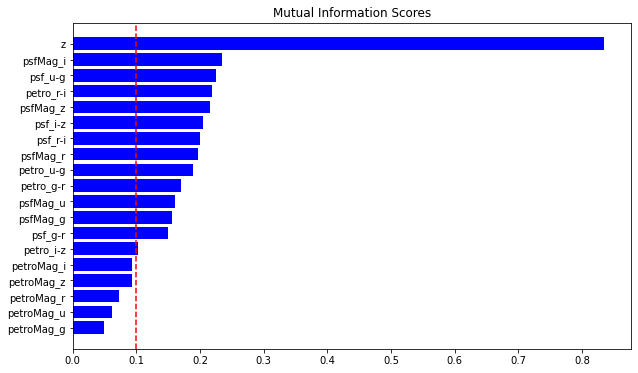

In [44]:
# Calculating MI scores
mi_scores = mutual_info_classif(X, Y)
indices = np.argsort(mi_scores)[::-1]

# Sorting feature names based on MI scores
sorted_feature_names = [X.columns[i] for i in indices]

# Creating horizontal bar plot
plt.figure(figsize=(10, 6))
plt.title("Mutual Information Scores")
plt.barh(range(X.shape[1]), mi_scores[indices], color="b", align="center")
plt.yticks(range(X.shape[1]), sorted_feature_names)
plt.gca().invert_yaxis()  # To display the highest score at the top

# Drawing a red dashed line at 0.1
plt.axvline(x=0.1, color='r', linestyle='--')

plt.show()

In [45]:
# Based on the ANOVA analysis, the (r-i) and (i-z) colors are not contributing much to the results. Therefore, they should be removed from the dataset
# However, the MI score tells us all the petrosian magnitudes are not contributing much to the prediction. Based on physics instinct, the petrosian magnitudes should provide some information about the surface flux of the galaxies, so we still want to reserve this information, therefore disregarding the MI scores.
sdss_final = sdss_final.drop(columns=['psf_r-i', 'psf_i-z', 'petro_r-i', 'petro_i-z'])
sdss_final

,z,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,psf_u-g,psf_g-r,petro_u-g,petro_g-r,Target
0,0.389562,23.125439,21.790100,20.101208,19.489414,19.024839,21.797628,20.614769,19.116451,18.525537,18.100412,1.335339,1.688892,1.182859,1.498318,1
1,0.000795,17.430862,16.606251,16.266584,16.134212,16.120159,17.541275,16.625443,16.326315,16.203777,16.185209,0.824611,0.339667,0.915832,0.299128,0
2,0.379204,23.658684,21.878881,19.953222,19.325336,18.858727,20.516718,20.508654,18.500441,17.840191,17.591818,1.779803,1.925659,0.008064,2.008213,1
3,0.379125,24.913301,22.357603,20.705986,19.984390,19.710501,24.590675,20.440012,19.447878,18.827709,18.500956,2.555698,1.651617,4.150663,0.992134,1
4,0.381811,24.833059,22.404722,20.614035,20.048290,19.560736,22.215349,20.974915,19.512709,18.837957,18.233456,2.428337,1.790687,1.240434,1.462206,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84947,-0.001109,21.239357,20.240782,19.922716,19.754583,19.715046,21.249580,20.297592,20.018015,19.885736,19.867411,0.998575,0.318066,0.951988,0.279577,0
84948,0.000013,23.282341,21.154026,19.759577,19.211868,18.812143,23.476542,21.261414,19.869307,19.248789,18.833431,2.128315,1.394449,2.215128,1.392107,0
84949,-0.001138,18.428312,17.006844,16.344975,16.033613,15.819430,18.453526,17.065052,16.357840,16.051132,15.877373,1.421468,0.661869,1.388474,0.707212,0
84950,0.219960,22.127785,20.882309,20.053568,19.667034,19.188293,20.659279,19.663300,18.849623,18.465277,18.644720,1.245476,0.828741,0.995979,0.813677,1


In [50]:
print(f"Number of Stars: {np.shape(sdss_final[sdss_final['Target'] == 0])[0]}")
print(f"Number of Galaxies: {np.shape(sdss_final[sdss_final['Target'] == 1])[0]}")
print(f"Number of Quasars: {np.shape(sdss_final[sdss_final['Target'] == 2])[0]}")
sdss_final.to_csv('SDSS_processed.csv', index=False)

Number of Stars: 39827
Number of Galaxies: 39609
Number of Quasars: 5516


Number of Stars: 5516
